# Solution 3.1 - Using OLS

## DRW & UofC Quant Foundations
### Summer 2024
#### Mark Hendricks
#### hendricks@uchicago.edu

# Data
* This homework uses the file, `data/multi_asset_etf_data.xlsx`.
* Find the data in the Github repo associated with the module, (link on Canvas.)

$$\newcommand{\spy}{\text{spy}}$$
$$\newcommand{\hyg}{\text{hyg}}$$

The data file contains...
* Return rates, $r_t^i$, for various asset classes, (via ETFs.)
* Most notable among these securities is SPY, the return on the S&P 500. Denote this as $r^{\spy}_t$.
* A separate tab gives return rates for a particular portfolio, $r_t^p$.

# 1. Regression
## 1. 
Estimate the regression of the portfolio return on SPY:

$$r^p_t = \alpha + \beta r^{\spy}_t + \epsilon_t^{p,\spy}$$

Specifically, report your estimates of alpha, beta, and the r-squared.

## 2. 
Estimate the regression of the portfolio return on SPY and on HYG, the return on high-yield
corporate bonds, denoted as $r^{\hyg}_t$:

$$r^p_t = {\alpha} + {\beta}^{\spy}r^{\spy}_t + {\beta}^{\hyg}r^{\hyg}_t + {\epsilon}_t$$

Specifically, report your estimates of alpha, the betas, and the r-squared.

*Note that the parameters (such as $\beta^{\spy}$) in this multivariate model are not the same as used in the univariate model of part 1. 

## 3. 
Calculate the series of fitted regression values, sometimes referred to as $\hat{y}$ in standard textbooks:

$$\hat{r}^p_t = \hat{\alpha} + \hat{\beta}^{\spy}r^{\spy}_t + \hat{\beta}^{\hyg}r^{\hyg}_t$$

Your statistical package will output these fitted values for you, or you can construct them using the estimated parameters.

How does this compare to the r-squared of the regression in problem 2?

## 4. 
How do the SPY betas differ across the univariate and multivariate models? How does this relate to the
correlation between $r^{\spy}$ and $r^{\hyg}$?

## 5. 
Without doing any calculation, would you expect the sample residual of the univariate regression or multivariate regression to have higher correlation to $r^{\hyg}$?

# <span style='color:red'>Solution 1</span>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
INFILE = "../data/multi_asset_etf_data.xlsx"

In [3]:
info = pd.read_excel(INFILE,sheet_name='info').set_index('ticker')
info

,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
ticker,,,,,,
SPY,SPDR S&P 500,ETF,USD,31915489,533350318080,The Trust seeks to achieve its investment obje...
EFA,iShares MSCI EAFE ETF,ETF,USD,14936082,54361296896,The fund generally will invest at least 80% of...
EEM,iShares MSCI Emerging Index Fun,ETF,USD,18737887,18598756352,The fund generally will invest at least 80% of...
PSP,Invesco Global Listed Private E,ETF,USD,7955,248697808,The fund generally will invest at least 90% of...
QAI,IQ Hedge MultiIQ Hedge Multi-St,ETF,USD,48268,560306880,"The fund is a ""fund of funds"" which means it i..."
HYG,iShares iBoxx $ High Yield Corp,ETF,USD,51364193,16733312000,The underlying index is a rules-based index co...
DBC,Invesco DB Commodity Index Trac,ETF,USD,891311,1784920832,The fund pursues its investment objective by i...
IYR,iShares U.S. Real Estate ETF,ETF,USD,3489431,2901542144,The fund seeks to track the investment results...
IEF,iShares 7-10 Year Treasury Bond,ETF,USD,5404923,29142607872,The underlying index measures the performance ...


In [4]:
rets = pd.read_excel(INFILE,sheet_name='total returns').set_index('Date')
rets

,SPY,EFA,EEM,PSP,QAI,HYG,DBC,IYR,IEF,BWX,TIP,SHV
Date,,,,,,,,,,,,
2009-04-30,0.099346,0.115190,0.155582,0.230203,0.022883,0.138460,-0.001000,0.296151,-0.027453,0.008993,-0.017951,0.000553
2009-05-31,0.058454,0.131918,0.159400,0.053892,0.027865,0.028555,0.162663,0.022728,-0.020773,0.053672,0.019966,-0.000472
2009-06-30,-0.000655,-0.014049,-0.022495,0.045449,-0.003436,0.033517,-0.026259,-0.024863,-0.005571,0.005148,0.001981,0.000599
2009-07-31,0.074606,0.100415,0.110146,0.143247,0.015326,0.069190,0.018568,0.105799,0.008317,0.031284,0.000879,-0.000027
2009-08-31,0.036940,0.045030,-0.013136,0.033413,-0.004151,-0.016969,-0.040365,0.131939,0.007635,0.007628,0.008413,0.000436
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31,0.015926,-0.004512,-0.045262,-0.006270,-0.003987,0.001163,0.013158,-0.050979,0.000726,-0.030630,0.003349,0.003995
2024-02-29,0.052187,0.029863,0.041678,0.041903,0.015677,0.003035,-0.015226,0.021326,-0.020826,-0.010788,-0.010477,0.003933
2024-03-31,0.032702,0.033786,0.027257,0.032782,0.014450,0.010898,0.044566,0.018538,0.007332,0.003882,0.006466,0.004161


In [5]:
port =  pd.read_excel(INFILE,sheet_name='portfolio returns').set_index('Date')
port

,portfolio
Date,
2009-04-30,0.130446
2009-05-31,0.020928
2009-06-30,0.002894
2009-07-31,0.068172
2009-08-31,0.042209
...,...
2024-01-31,-0.015127
2024-02-29,0.014520
2024-03-31,0.018276


## <span style='color:red'>1.1</span>

In [6]:
X = sm.add_constant(rets['SPY'])
y = port
mod = sm.OLS(y, X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     575.0
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           6.19e-58
Time:                        20:46:41   Log-Likelihood:                 499.84
No. Observations:                 182   AIC:                            -995.7
Df Residuals:                     180   BIC:                            -989.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.001     -1.347      0.180      -0.004       0.001
SPY            0.6525      0.027     23.979      0.000       0.599       0.706
==============================================================================
Omnibus:                       15.927   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.143
Skew:                           0.473   Prob(JB):                     2.10e-06
Kurtosis:                       4.597   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <span style='color:red'>1.2</span>

In [7]:
X = sm.add_constant(rets[['SPY', 'HYG']])
y = port
mod_multi = sm.OLS(y, X).fit()
mod_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     454.1
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           7.57e-71
Time:                        20:46:41   Log-Likelihood:                 533.53
No. Observations:                 182   AIC:                            -1061.
Df Residuals:                     179   BIC:                            -1051.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.001     -1.659      0.099      -0.004       0.000
SPY            0.4048      0.036     11.318      0.000       0.334       0.475
HYG            0.5370      0.060      8.956      0.000       0.419       0.655
==============================================================================
Omnibus:                        2.116   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.929
Skew:                           0.252   Prob(JB):                        0.381
Kurtosis:                       3.023   Cond. No.                         69.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice that the beta on SPY is much lower now that we include CL1. Also note that the R-squared is much higher.

## <span style='color:red'>1.3</span>

The squared correlation is exactly the R^2, as R^2 captures the correlation of Portfolio's return and the combined space spanned by both regressors.

In [8]:
corr_port = port.corrwith(mod.fittedvalues).values[0]
corr_port_multi = port.corrwith(mod_multi.fittedvalues).values[0]
print(f'Correlation between portfolio and replication: {corr_port_multi:.2%}.')
print(f'Square of this correlation is {corr_port_multi**2:.2%}\nwhich equals the R-squared.')

Correlation between portfolio and replication: 91.40%.
Square of this correlation is 83.54%
which equals the R-squared.


## <span style='color:red'>1.4</span>

In [9]:
TICKreg1 = 'SPY'
TICKreg2 = 'HYG'
corrREGS = rets[TICKreg2].corr(rets[TICKreg1])
print(f'Correlation between {TICKreg1} and {TICKreg2} is {corrREGS:.1%}')

Correlation between SPY and HYG is 77.3%


The beta for SPY in (2) is much smaller than in (1). This is because HYG and SPY are significantly correlated, therefore a large proportion of the variation in the Portfolio return which was being attributed to SPY (in eq 1) was actually better explained by HYG. Thus, in eq (2) this gets attributed more directly to HYG, and less is attributed to SPY.

## <span style='color:red'>1.5</span>

Without doing calculation, the intuition is that the second regression includes HYG as a regressor. Sample residuals are always uncorrelated (in-sample) to the regressors. Thus, in this regression we know the sample residual will have zero correlation to HYG. In the first regression, HYG was not a regressor, so it may have substantial correlation to the sample residual.

For population residuals, $\epsilon$, we still expect much smaller correlation to HYG in the second regression, though this population residual may still have some correlation to HYG.

In [10]:
print(f'Correlation between {TICKreg2} and the sample residual:\nUnivariate = {TICKreg1}: {rets[TICKreg2].corr(mod.resid):.2%}')
print(f'Multivariate = {TICKreg1} and {TICKreg2}: {rets[TICKreg2].corr(mod_multi.resid):.2%}')

Correlation between HYG and the sample residual:
Univariate = SPY: 35.27%
Multivariate = SPY and HYG: -0.00%


***

# 2. Decomposing and Replicating

## 1.
The portfolio return, $r_t^p$, is a combination of the base assets that are provided here. Use linear regression to uncover which weights were used in constructing the portfolio.

$$r_t^p = \alpha +\left(\boldsymbol{\beta}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the individual securities.
* What does the regression find were the original weights?
* How precise is the estimation? Consider the R-squared and t-stats.

*Feel free to include an $\alpha$ in this model, even though you know the portfolio is an exact function of the individual securities. The estimation should find $\alpha$ of (nearly) zero.*


## 2.

$$\newcommand{\targ}{EEM}$$

Suppose that we want to mimic a return, **EEM** using the other returns. Run the following regression–but
do so **only using data through the end of 2022.**

$$r_t^{\targ} = \alpha +\left(\boldsymbol{\beta}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the other securities, excluding the target, **EEM**.

#### (a) 
Report the r-squared and the estimate of the vector, $\boldsymbol{\beta}$.

#### (b) 
Report the t-stats of the explanatory returns. Which have absolute value greater than 2?

#### (c) 
Plot the returns of **EEM** along with the replication values.

## 3.
Perhaps the replication results in the previous problem are overstated given that they estimated the parameters within a sample and then evaluated how well the result fit in the same sample. This is known as in-sample fit.

Using the estimates through **2022**, (the α and βˆ from the previous problem,) calculate the out-of-sample (OOS) values of the replication, using the **2023-2024** returns, denoted $\boldsymbol{r}_t^{\text{oos}}$:

$$\hat{r}_t^{\targ} = \left(\widehat{\boldsymbol{\beta}}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t^{\text{oos}}$$

#### (a) 
What is the correlation between $\hat{r}_t^{\targ}$ and $\boldsymbol{r}_t^{\text{oos}}$?

#### (b) 
How does this compare to the r-squared from the regression above based on in-sample data, (through 2020?)

***

# <span style='color:red'>Solution 2</span>

## <span style='color:red'>2.1</span>

In [11]:
X = sm.add_constant(rets)
y = port
mod_exact = sm.OLS(y, X).fit()
display(mod_exact.params.to_frame().rename(columns={0:'weights'}).sort_values('weights',ascending=False).T.style.format('{:.2f}'))
mod_exact.summary()

,IEF,QAI,IYR,PSP,const,SHV,BWX,HYG,TIP,DBC,EEM,EFA,SPY
weights,0.25,0.25,0.25,0.25,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.106e+28
Date:                Sat, 15 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:46:41   Log-Likelihood:                 6124.2
No. Observations:                 182   AIC:                        -1.222e+04
Df Residuals:                     169   BIC:                        -1.218e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.82e-16   5.78e-17     10.066      0.000    4.68e-16    6.96e-16
SPY        -1.301e-15      3e-15     -0.433      0.665   -7.23e-15    4.63e-15
EFA        -1.231e-15   3.06e-15     -0.402      0.688   -7.27e-15    4.81e-15
EEM        -8.212e-16   1.78e-15     -0.462      0.645   -4.33e-15    2.69e-15
PSP            0.2500   2.14e-15   1.17e+14      0.000       0.250       0.250
QAI            0.2500   8.16e-15   3.06e+13      0.000       0.250       0.250
HYG        -3.475e-16   3.57e-15     -0.097      0.923    -7.4e-15    6.71e-15
DBC        -5.084e-16   1.31e-15     -0.387      0.699    -3.1e-15    2.08e-15
IYR            0.2500   1.56e-15    1.6e+14      0.000       0.250       0.250
IEF            0.2500   5.44e-15   4.59e+13      0.000       0.250       0.250
BWX        -3.389e-16   3.72e-15     -0.091      0.928   -7.68e-15    7.01e-15
TIP        -4.396e-16    5.9e-15     -0.075      0.941   -1.21e-14    1.12e-14
SHV         5.389e-16   3.53e-14      0.015      0.988   -6.92e-14    7.03e-14
==============================================================================
Omnibus:                       10.199   Durbin-Watson:                   0.390
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               17.078
Skew:                          -0.268   Prob(JB):                     0.000196
Kurtosis:                       4.402   Cond. No.                         781.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <span style='color:red'>2.2</span>

In [12]:
T1 = '2022'
T2 = '2023'
TICKrep = 'EEM'

rets_IS = rets.loc[:T1,:]

X = sm.add_constant(rets_IS.drop(columns=TICKrep))
y = rets_IS[[TICKrep]]
mod_replicate = sm.OLS(y, X).fit()
mod_replicate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EEM   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     51.74
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           6.50e-46
Time:                        20:46:41   Log-Likelihood:                 367.64
No. Observations:                 165   AIC:                            -711.3
Df Residuals:                     153   BIC:                            -674.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.003      0.750      0.455      -0.003       0.007
SPY           -0.3183      0.142     -2.240      0.027      -0.599      -0.038
EFA            0.5297      0.135      3.925      0.000       0.263       0.796
PSP           -0.0013      0.108     -0.012      0.991      -0.214       0.212
QAI            1.2533      0.365      3.436      0.001       0.533       1.974
HYG            0.1732      0.164      1.057      0.292      -0.151       0.497
DBC            0.0025      0.060      0.041      0.967      -0.117       0.122
IYR            0.1083      0.071      1.524      0.130      -0.032       0.249
IEF           -0.8330      0.256     -3.254      0.001      -1.339      -0.327
BWX            0.5563      0.166      3.350      0.001       0.228       0.884
TIP            0.2111      0.273      0.773      0.441      -0.328       0.751
SHV            0.2738      2.702      0.101      0.919      -5.065       5.612
==============================================================================
Omnibus:                        0.876   Durbin-Watson:                   2.380
Prob(Omnibus):                  0.645   Jarque-Bera (JB):                0.902
Skew:                          -0.008   Prob(JB):                        0.637
Kurtosis:                       2.638   Cond. No.                     1.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The R-squared is reported in the table above.

Note that while we can estimate an R-squared, it doesn't make much sense in a regression without an intercept. 
- It does not need to be between 0 and 1.

The stats-models Python package puts a "Note" at the bottom of the table above reminding users of that fact.

### See the t-stats below, in descending order:

In [13]:
mod_replicate.tvalues.sort_values(ascending=False).to_frame().rename(columns={0:'t-stats'}).T.style.format('{:.1f}')

,EFA,QAI,BWX,IYR,HYG,TIP,const,SHV,DBC,PSP,SPY,IEF
t-stats,3.9,3.4,3.3,1.5,1.1,0.8,0.7,0.1,0.0,-0.0,-2.2,-3.3


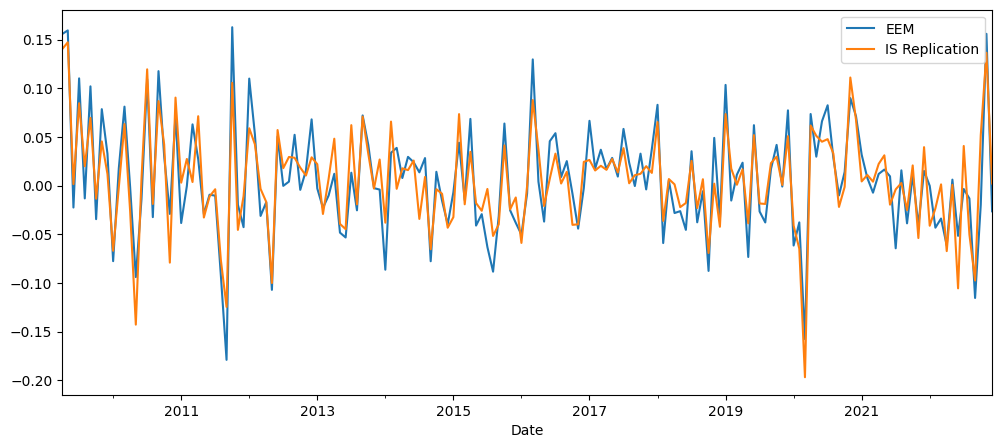

In [14]:
pd.concat([y, mod_replicate.fittedvalues.rename('IS Replication')], axis=1).plot(figsize=(12, 5))
plt.show()

## 2.3

In [15]:
reg = LinearRegression(fit_intercept=True).fit(X,y)
fit_comp_IS = pd.concat([y,pd.DataFrame(reg.predict(X),index=y.index)],axis=1).rename(columns={0:'IS'})
corr_IS = fit_comp_IS.corr().iloc[0,1]

In [16]:
rets_OOS = rets.loc[T2:,:]
X = sm.add_constant(rets_OOS.drop(columns=TICKrep))
y = rets_OOS[[TICKrep]]

fit_comp_OOS = pd.concat([y,pd.DataFrame(reg.predict(X),index=y.index)],axis=1).rename(columns={0:'OOS'})
corr_OOS = fit_comp_OOS.corr().iloc[0,1]

In [17]:
print(f'Correlation between {TICKrep} and Replicating Portfolio')
print(f'In-Sample: {corr_IS:.1%}')
print(f'Out-of-Sample: {corr_OOS:.1%}')

Correlation between EEM and Replicating Portfolio
In-Sample: 88.8%
Out-of-Sample: 92.3%


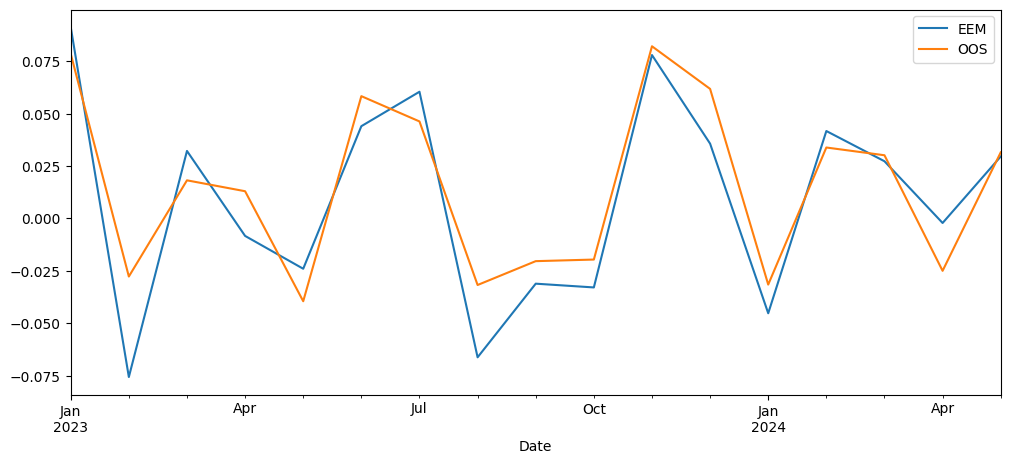

In [18]:
fit_comp_OOS.plot(figsize=(12, 5))
plt.show()